# Intro to Pandas

## Basic Statistic

Pandas objects are equipped with a set of common mathematical and statistical buit-in methods. 

Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values from
the rows or columns of a DataFrame.

#### Documentation

In [1]:
import webbrowser
url = "http://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf"
webbrowser.open(url)

True

Imports

In [3]:
# standard Imports
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

Create a DataFrame 

In [4]:
#Let's create a dataframe to work with
array = np.array([[1,2,np.nan,4],
                  [np.nan,6,7,np.nan],
                  [9,10,np.nan,12],
                  [13,14,15,16]])

dframe1 = DataFrame(data = array, index=['A','B','C','D'], columns = ['Col1','Col2','Col3','Col4'])

#Show
dframe1

,Col1,Col2,Col3,Col4
A,1.0,2.0,NaN,4.0
B,NaN,6.0,7.0,NaN
C,9.0,10.0,NaN,12.0
D,13.0,14.0,15.0,16.0


#### By default every method performe the computation on the columns (axis=0) 
**Note:** Axis 0 or 1 specifies the axis along which the sum is computed.

Sum

In [7]:
#Let's see the sum() method in action
dframe1.sum(axis=0)

Col1    23.0
Col2    32.0
Col3    22.0
Col4    32.0
dtype: float64

**Note:** The method ignores NaN values

In [8]:
# We can also work over rows instead of columns
# Of course we have to specify the axis

dframe1.sum(axis=1)

A     7.0
B    13.0
C    31.0
D    58.0
dtype: float64

The mean

In [9]:
# mean
dframe1.mean()

Col1     7.666667
Col2     8.000000
Col3    11.000000
Col4    10.666667
dtype: float64

Min and Max value

In [10]:
# We can also grab min and max values of dataframe
# On the columns
dframe1.min()

Col1    1.0
Col2    2.0
Col3    7.0
Col4    4.0
dtype: float64

In [11]:
# Max value on the rows
dframe1.max(axis=1)

A     4.0
B     7.0
C    12.0
D    16.0
dtype: float64

In [12]:
# Show the df
dframe1

,Col1,Col2,Col3,Col4
A,1.0,2.0,NaN,4.0
B,NaN,6.0,7.0,NaN
C,9.0,10.0,NaN,12.0
D,13.0,14.0,15.0,16.0


We can grab the index where there's the min or max value

In [15]:
#As well as there index
dframe1.idxmin()

Col1    A
Col2    A
Col3    B
Col4    A
dtype: object

In [16]:
#Show
dframe1

,Col1,Col2,Col3,Col4
A,1.0,2.0,NaN,4.0
B,NaN,6.0,7.0,NaN
C,9.0,10.0,NaN,12.0
D,13.0,14.0,15.0,16.0


Accumulation sum

In [17]:
# Accumulation sum
# Of course we can change the axis

dframe1.cumsum()

,Col1,Col2,Col3,Col4
A,1.0,2.0,NaN,4.0
B,NaN,8.0,7.0,NaN
C,10.0,18.0,NaN,16.0
D,23.0,32.0,22.0,32.0


#### Summary Statistic

In [19]:
#A very useful feature is describe method, which provides summary statistics
dframe1.describe()

,Col1,Col2,Col3,Col4
count,3.000000,4.000000,2.000000,3.000000
mean,7.666667,8.000000,11.000000,10.666667
std,6.110101,5.163978,5.656854,6.110101
min,1.000000,2.000000,7.000000,4.000000
25%,5.000000,5.000000,9.000000,8.000000
50%,9.000000,8.000000,11.000000,12.000000
75%,11.000000,11.000000,13.000000,14.000000
max,13.000000,14.000000,15.000000,16.000000


## Unique Values, Value Counts, and Membership

#### Unique values

In [34]:
# First we craete a sample dataframe
df = DataFrame({'Col1':['a','b','a','c','a'],
                'Col2':['x','y','x','z','x']})

df

,Col1,Col2
0,a,x
1,b,y
2,a,x
3,c,z
4,a,x


The **unique()** method is a method inside the Series, to performe it of a data frame you have to select either a column or a row

In [35]:
# Unique values on column
df['Col1'].unique()

array(['a', 'b', 'c'], dtype=object)

In [36]:
# Unique value on row
df.iloc[1].unique()

array(['b', 'y'], dtype=object)

#### Value Count

In [37]:
# On column
df['Col1'].value_counts()

a    3
c    1
b    1
Name: Col1, dtype: int64

In [38]:
# On row
df.iloc[1].value_counts()

y    1
b    1
Name: 1, dtype: int64

#### Membership

The **isin()** is very useful in
filtering a data set down to a subset of values in a Series or column in a DataFrame.

In [39]:
# show the df
df

,Col1,Col2
0,a,x
1,b,y
2,a,x
3,c,z
4,a,x


In [44]:
# check if our values are inside the df
dfbool = df.isin(['a','c'])
dfbool

,Col1,Col2
0,True,False
1,False,False
2,True,False
3,True,False
4,True,False


## Correlation 

For more info on correlation and covariance, check out the link below!

In [46]:
import webbrowser
url = 'http://benalexkeen.com/correlation-in-python/'
webbrowser.open(url)

True

Correlation infographic

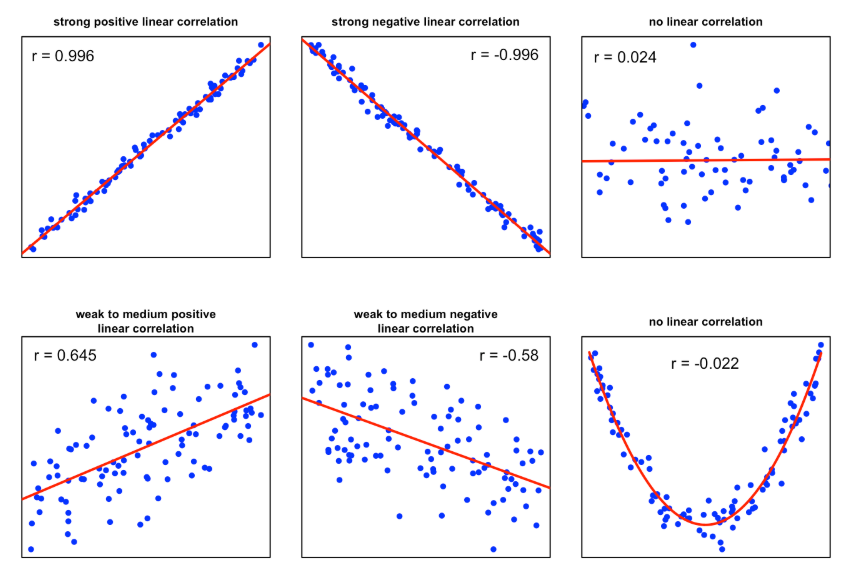

In [47]:
from IPython.display import Image
Image(filename='../Images/correlation.png') 

## Correlation on the House Prices Dataset

* Dataset [link](http://archive.ics.uci.edu/ml/machine-learning-database/housing/housing.data)
* UCI Machine Learning Archive [link](http://archive.ics.uci.edu/ml/index.php)

### Variable Dictionary:

* **CRIM:** Per capita crime rate by town
* **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft
* **INDUS:** Proportion of non-retail business acres per town
* **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX:** Nitric oxide concentration (parts per 10 million)
* **RM:** Average number of rooms per dwelling
* **AGE:** Proportion of owner-occupied units built prior to 1940
* **DIS:** Weighted distances to five Boston employment centers
* **RAD:** Index of accessibility to radial highways
* **TAX:** Full-value property tax rate per 10.000 dollars
* **PTRATIO:** Pupil-teacher ratio by town
* **B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* **LSTAT:** Percentage of lower status of the population
* **TARG:** Median value of owner-occupied homes in $1000s

#### Raeding the dataset

In [55]:
# read the dataset
houses_df = pd.read_csv('../Data/boston_house_prices.csv')
houses_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARG
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Compute the correlation

In [56]:
# isolate the columns
cols = houses_df.columns
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARG'],
      dtype='object')

Compute the correlation

In [60]:
# correlation of the target variable
correlatins = houses_df[cols].corrwith(houses_df.TARG)

Sort the correlation values

In [62]:
# sort correlation
correlatins.sort_values(ascending=False)

TARG       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64

## Explore the correlation with the PairPlot

Reshape the df

In [63]:
# reshape the df
houses_df = houses_df[['DIS', 'B','ZN','RM','TARG']]
houses_df.head()

,DIS,B,ZN,RM,TARG
0,4.0900,396.90,18.0,6.575,24.0
1,4.9671,396.90,0.0,6.421,21.6
2,4.9671,392.83,0.0,7.185,34.7
3,6.0622,394.63,0.0,6.998,33.4
4,6.0622,396.90,0.0,7.147,36.2


Visualization Imports

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Plotting

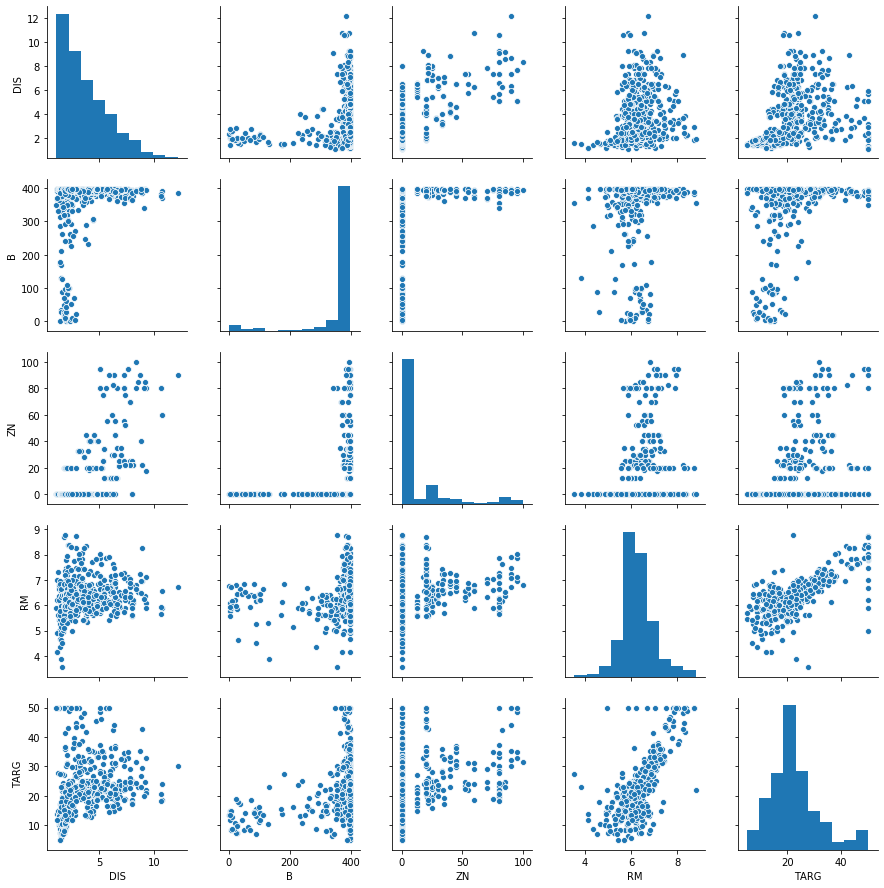

In [65]:
# plot function
sns.pairplot(houses_df)

# show
plt.show()

## Correlation Matrix

Creation of the correlation matrix

In [66]:
# the corr() method
corr_matrix = houses_df.corr()
corr_matrix

,DIS,B,ZN,RM,TARG
DIS,1.000000,0.291512,0.664408,0.205246,0.249929
B,0.291512,1.000000,0.175520,0.128069,0.333461
ZN,0.664408,0.175520,1.000000,0.311991,0.360445
RM,0.205246,0.128069,0.311991,1.000000,0.695360
TARG,0.249929,0.333461,0.360445,0.695360,1.000000


Plotting the Correlation Matrix

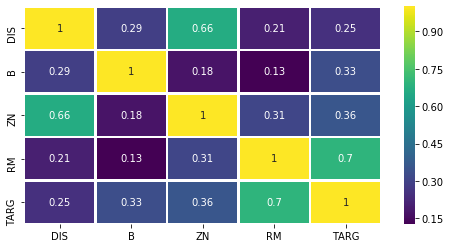

In [67]:
# fig size
plt.figure(figsize=(8,4))

# heatmap function
sns.heatmap(corr_matrix, annot=True, linewidths=1.5,cmap='viridis')

# show
plt.show()

# Let's do some exercise!